Keras 可以用不同的深度學習套件當底層

In [1]:
%env KERAS_BACKEND=tensorflow
## '%env'是jupyter中設定環境變數

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 讀入MNIST數據庫

In [3]:
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
len(x_train)

60000

## 數據庫內容
輸入(x)就是0~9中的一個圖樣，而(y)就是就是“正確答案”

In [6]:
x_train[9487].shape

(28, 28)

In [7]:
x_train[9487]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
y_train[9487]

1

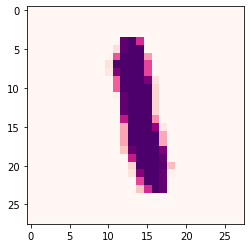

In [9]:
plt.imshow(x_train[9487], cmap='RdPu') ## cmap='Greys'

### 整理輸入格式
要把整個二維或多維的資料變成一維 28x28=784 

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

### 1-hot-encoding

In [12]:
from keras.utils import np_utils

In [13]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [14]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 打造神經網路
<li>使用2個hidden layer</li>
<li>用500個神經元</li>
<li>sigmoid</li>    

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD ## 隨機型 （最標準）

In [16]:
model = Sequential() ## 空的神經網路學習機

In [17]:
model.add(Dense(500,input_dim = 784))##第一層,500個神經元 
model.add(Activation('sigmoid'))

In [18]:
model.add(Dense(500))                ## 第二層
model.add(Activation('sigmoid'))

In [19]:
model.add(Dense(10))                 ## 輸出
model.add(Activation('softmax'))## 會將10個出輸出相加=1

## 組裝神經網路

<li>決定使用的loss function</li>
<li>決定optimizer,標準的SGD</li>
<li>設learning rate</li>

In [20]:
model.compile(loss='mse', optimizer=SGD(lr=0.1)##想要用什麼方式訓練你的模型
               , metrics=['accuracy'])

## 檢視神經網路

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
activation (Activation)      (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
__________________________________________________

In [22]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0880 - accuracy: 0.2552
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0687 - accuracy: 0.5796
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0489 - accuracy: 0.7446
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0353 - accuracy: 0.8325
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0267 - accuracy: 0.8703
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0221 - accuracy: 0.8875
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0192 - accuracy: 0.8963
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0172 - accuracy: 0.9042
Epoch 9/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0155 - accuracy: 0.9114
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0144 - accuracy: 0.9174

In [23]:
from ipywidgets import interact_manual

In [24]:
predict = model.predict_classes(x_test)

/Users/hao/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
def test(id):
    plt.imshow(x_test[id].reshape(28,28),cmap='Greys') 
    print("神經網路判斷為：",predict[id])

In [26]:
interact_manual(test, id=(0,9999))

interactive(children=(IntSlider(value=4999, description='id', max=9999), Button(description='Run Interact', st…

<function __main__.test(id)>

In [27]:
model_json = model.to_json()
open('first_DL.json','w').write(model_json)## 存神經網路的格式
model.save_weights('first_DL_Weights.h5')## 存我們訓練好的weight